implementation:

*   https://www.kaggle.com/daisukelab/cnn-2d-basic-solution-powered-by-fast-ai
*   https://www.kaggle.com/mhiro2/simple-2d-cnn-classifier-with-pytorch

### Downloading dataset

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199305&Signature=nLDx%2BYDsFM3Gf6L2XXBsH4uOEVhu461STSiMpSojzQalhyysZ5WY0gBOMOHQl8zYHksoQXxWwCZC75w%2BHDW9YT01r2qTmoDSV0yZlCBmie6m8s331wgPCxSUn7yqCYc3izBM1vPc8w8cjX4nWhUWD6SDrTNR8bGeBm34zFT8xabKAqk4%2BcQj91J9H5YN06d67JoeNUhWgfOjg2Bx72jREfmJEe%2F6Yk3HRGDVZqI%2B4RqrOCUvuSr8a3BtWTgyXxNVFMmOh2940hB1arFpT6QXSd6gnlCgWn%2FnP9vRQgiDNe8JuLNilFUjNczjScKxq3MGL%2F%2FgzDYyrC4A0QtsuKvrwA%3D%3D" -O "sample_submission.csv" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199325&Signature=eDzG3Rj4HiIGtoqN6oylbg43L7pY65blM6b7LSfJj0T4Xps1%2F8N8daZl1rtQB5ytSQYkoKalQ3tA4GpN84qPCxKwE7SE3VKHHhydduWiyR6kjmr1l39Q6yvaqrDPFfUibpRZzws9zb4m59zGTA6w27EZE9RES6qEsKyb7BNs9hun5vcVZ3RUH911S6HvotsaQyzSmKyGwFpABGFJ65FKHlQUXV9%2Bi7HJOGQkrm0H1csJiKJAwlooPtzZnKfySCcxxzC%2FTkRClXIhXu6aXac4WTbZdv8qvKPnMYBTw4c0HfKjKfZY4YkhuOSOubse1KjvqPWFCrNOGssGySwMMlS%2BGg%3D%3D" -O "train_curated.csv" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199339&Signature=Bo0oN7C3vGwMqFgITGzs3V6sQ8i2hHaKaV77BQ1XmCI3kJZQr2OlfklTmHfAR%2Fovd4OIMqzHojwcSBpeMACqHmRyPIcjK0dvys9rNytMkFK7crqagDF08DtQCT2G8sMMcTO21a8K30vDr4pq2QixGbGG50tifIiwKGHx%2FfW5v3f9NU7i6r8HCEHqHg0qudoLhAq0c%2BAYBKU3fEfr8vBrL7N1aOzTPLi%2BkBJA450bjlU2VCIC35f6TWNOxyrPhvL%2BP8De3d99K5Rln2mDGVC2ML%2F7rB9pGHHpi8YLBS8lkdRgoxjQ5iV7Ncny7e6GKCUMshdv7MXK8TR5KhFcGTuKTg%3D%3D" -O "train_noisy.csv" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199354&Signature=F59dLNVZlGsD4JmPHku4oFHauuxDZ2OHQJ8suvqpHl6psLLiGprF51oSogYSi9FxEW3UM%2F63UXA3QaLdGmkWsfQ3Le50iopI38A2YQ3YKwOfh77rvXrR04oLwRy1fx%2F3YGVi7YqLTXPzK%2BxFBTJkkhr2Tm3x01aVVGwUdiRl0dNpxYGjcqbZKNT7SrgKvhaPlZblY5z%2BC%2BW0exezEtaDhiVIFuIoWVGgJ9BlVHJup%2FlQQwBLXRCjxxQ7Tk8vJT8lY9gHUVSz5mfLV36uky3py1u8dppXYJucIZy%2Ff8al%2ByZUq2kptpD9zYgqY0Rb3XUWNYy0vTwiLApBxs8gph2NBw%3D%3D" -O "test.zip" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_curated.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199367&Signature=S2KUh5B5AvqUSmgMALRmy3n3ciY38qTAY4hvnkm0IVsQkbwVXR4l54k5%2BsLgF%2FF4LSCBSHLj3iQzEqKe%2F%2BC0xhJ6yqdzo99m4rtLdCY0Ti9VN5rX%2BUHODRVG6x7AUli1YaD6epTpFomk1VOv5VflGjYby5Z%2FnSJdi7CzqAWauz72OciNig16a4C8nwov7nD4C1YfWaXhNCKL9GwhOUNBOXZRKBOI0mFGbCEcuvKgN9EiVwnVI7LPHAnTgTVi3fSqOUC0HHsFNRn2D3baTsuhVO1NhI2%2BSxCqgZ1r0oiCO99DCIuIgIbTPjqXTBt3ZzEnAHEJzgNaQwbO1yzuAc2IMg%3D%3D" -O "train_curated.zip" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10700/371136/train_noisy.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199379&Signature=Tj593Alo%2BbMJW0jnl5aeoAISyeWpskbGBKmFgPz29upyi4aL7GOxCnvx%2FRJ00WDOoPxLyg9KLMwbJZi9ldkhzwUulXTZjV%2BG3AYRbtH0mXv3OeaNDJjrdj3L5RYUjroxrIHumD%2FeNljH1up0U5d277UZZIcAUq4XwNywkswYJZIx3ZyeYKVmmAnqrP8tRIVzwkQImQ0qUQXKkulE9yxeBHy7cwHF3fgZ1XvJY5ufQ1uLHsxg2MmBvs%2F55XysoUxceEAODH8QlfTzWSuXbvk9a5RJhwvOY5DcAVWmSsUAdc9pkdfot39UF%2FTtRQUNc2Act6lxHANox3G%2F%2FdAKMcW4Jw%3D%3D" -O "train_noisy.zip" -c

***Preprocessed data***

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-datasets/164278/379726/fat2019_prep_mels1.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1558199409&Signature=FqySkqoKh6jWth%2FiddbbCfPjl1VJBe0m%2BtQNrL5vYLI8UCxFpXxh2L0kc0rcndjlj77sv%2BFF3Da%2BWQJfocuoQIYueyhIRA7fUxLEwlZIMtRmpZ4FQa6LkEfIGyM4IDoXJ%2BFGOPmFadDApruNgSO0XnxNrAM2TkdlS6MiQqpr%2FdyOej5KhvYlLnmXzCG%2FQdSwZmVTEqAvPVwRoNzmueZZttuxmL5aTvVuBjia%2BaC6jxwWzRO8emOE3z2ALRbz5gwSWToP%2BqhrEa7CyX7xZ7r%2Fwf1kk8z8rgZzl2Koi2y7Wt1DRL1QNoMhpTASEed1y2gvEL25lFi6yHu1ISDzUhSQKw%3D%3D" -O "fat2019_prep_mels1.zip" -c

### Exploring dataset

In [0]:
!mkdir test
!mkdir train_curated
!mkdir train_noisy
!mkdir data

In [0]:
!unzip -qq fat2019_prep_mels1.zip -d data

In [0]:
!unzip -qq test.zip -d test

In [0]:
!unzip -qq train_curated.zip -d train_curated

In [0]:
!unzip -qq train_noisy.zip -d train_noisy

To apply deep learning technique, we first have to come up with a way to provide effective converse from audio data to any other form which will make it effective for deep learning technique for multilabeling

Audio conversion to 2D
Almost copyed from my repository: https://github.com/daisukelab/ml-sound-classifier

Handle sampling rate 44.1kHz as is, no information loss.
Size of each file will be 128 x L, L is audio seconds x 128; [128, 256] if sound is 2s long.
Convert to Mel-spectrogram, not MFCC. We are handling general sound rather than human voice. https://en.wikipedia.org/wiki/Spectrogram

In [0]:
!mv -t data test train_curated train_noisy

In [0]:
!mv sample_submission.csv train_curated.csv train_noisy.csv data

In [0]:
!ls data

## Testing different dL techniques

### 2. Pytorch

***Simple changes, significant improvement in lb***

Now with different convolution architecture

***Original***

In [0]:
import gc
import os
import pickle
import random
import time
from collections import Counter, defaultdict
from functools import partial
from pathlib import Path
from psutil import cpu_count

import librosa
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
#from skmultilearn.model_selection import iterative_train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms

from fastprogress import master_bar, progress_bar
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms

In [0]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 520
seed_everything(SEED)

In [0]:
N_JOBS = cpu_count()
os.environ['MKL_NUM_THREADS'] = str(N_JOBS)
os.environ['OMP_NUM_THREADS'] = str(N_JOBS)
DataLoader = partial(DataLoader, num_workers=N_JOBS)

In [0]:
# from official code https://colab.research.google.com/drive/1AgPdhSp7ttY18O3fEoHOQKlt_3HJDLi8#scrollTo=cRCaCIb9oguU
def _one_sample_positive_class_precisions(scores, truth):
    """Calculate precisions for each true class for a single sample.

    Args:
      scores: np.array of (num_classes,) giving the individual classifier scores.
      truth: np.array of (num_classes,) bools indicating which classes are true.

    Returns:
      pos_class_indices: np.array of indices of the true classes for this sample.
      pos_class_precisions: np.array of precisions corresponding to each of those
        classes.
    """
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)
    # Only calculate precisions if there are some true classes.
    if not len(pos_class_indices):
        return pos_class_indices, np.zeros(0)
    # Retrieval list of classes for this sample.
    retrieved_classes = np.argsort(scores)[::-1]
    # class_rankings[top_scoring_class_index] == 0 etc.
    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)
    # Which of these is a true label?
    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True
    # Num hits for every truncated retrieval list.
    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
    # Precision of retrieval list truncated at each hit, in order of pos_labels.
    precision_at_hits = (
            retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
            (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits


def calculate_per_class_lwlrap(truth, scores):
    """Calculate label-weighted label-ranking average precision.

    Arguments:
      truth: np.array of (num_samples, num_classes) giving boolean ground-truth
        of presence of that class in that sample.
      scores: np.array of (num_samples, num_classes) giving the classifier-under-
        test's real-valued score for each class for each sample.

    Returns:
      per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each
        class.
      weight_per_class: np.array of (num_classes,) giving the prior of each
        class within the truth labels.  Then the overall unbalanced lwlrap is
        simply np.sum(per_class_lwlrap * weight_per_class)
    """
    assert truth.shape == scores.shape
    num_samples, num_classes = scores.shape
    # Space to store a distinct precision value for each class on each sample.
    # Only the classes that are true for each sample will be filled in.
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = (
            _one_sample_positive_class_precisions(scores[sample_num, :],
                                                  truth[sample_num, :]))
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
            precision_at_hits)
    labels_per_class = np.sum(truth > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))
    # Form average of each column, i.e. all the precisions assigned to labels in
    # a particular class.
    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
    #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
    #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
    #                = np.sum(per_class_lwlrap * weight_per_class)
    return per_class_lwlrap, weight_per_class

In [0]:
dataset_dir = Path('data')
preprocessed_dir = Path('data')

In [0]:
csvs = {
    'train_curated': dataset_dir / 'train_curated.csv',
    #'train_noisy': dataset_dir / 'train_noisy.csv',
    'train_noisy': preprocessed_dir / 'trn_noisy_best50s.csv',
    'sample_submission': dataset_dir / 'sample_submission.csv',
}

dataset = {
    'train_curated': dataset_dir / 'train_curated',
    'train_noisy': dataset_dir / 'train_noisy',
    'test': dataset_dir / 'test',
}

mels = {
    'train_curated': preprocessed_dir / 'mels_train_curated.pkl',
    'train_noisy': preprocessed_dir / 'mels_trn_noisy_best50s.pkl',
    'test': preprocessed_dir / 'mels_test.pkl',  # NOTE: this data doesn't work at 2nd stage
}

In [7]:
train_curated = pd.read_csv(csvs['train_curated'])
train_noisy = pd.read_csv(csvs['train_noisy'])
train_df = pd.concat([train_curated, train_noisy], sort=True, ignore_index=True)
train_df.head()

,fname,labels,singled
0,0006ae4e.wav,Bark,NaN
1,0019ef41.wav,Raindrop,NaN
2,001ec0ad.wav,Finger_snapping,NaN
3,0026c7cb.wav,Run,NaN
4,0026f116.wav,Finger_snapping,NaN


In [8]:
test_df = pd.read_csv(csvs['sample_submission'])
test_df.head()

,fname,Accelerating_and_revving_and_vroom,Accordion,Acoustic_guitar,Applause,Bark,Bass_drum,Bass_guitar,Bathtub_(filling_or_washing),Bicycle_bell,Burping_and_eructation,Bus,Buzz,Car_passing_by,Cheering,Chewing_and_mastication,Child_speech_and_kid_speaking,Chink_and_clink,Chirp_and_tweet,Church_bell,Clapping,Computer_keyboard,Crackle,Cricket,Crowd,Cupboard_open_or_close,Cutlery_and_silverware,Dishes_and_pots_and_pans,Drawer_open_or_close,Drip,Electric_guitar,Fart,Female_singing,Female_speech_and_woman_speaking,Fill_(with_liquid),Finger_snapping,Frying_(food),Gasp,Glockenspiel,Gong,...,Harmonica,Hi-hat,Hiss,Keys_jangling,Knock,Male_singing,Male_speech_and_man_speaking,Marimba_and_xylophone,Mechanical_fan,Meow,Microwave_oven,Motorcycle,Printer,Purr,Race_car_and_auto_racing,Raindrop,Run,Scissors,Screaming,Shatter,Sigh,Sink_(filling_or_washing),Skateboard,Slam,Sneeze,Squeak,Stream,Strum,Tap,Tick-tock,Toilet_flush,Traffic_noise_and_roadway_noise,Trickle_and_dribble,Walk_and_footsteps,Water_tap_and_faucet,Waves_and_surf,Whispering,Writing,Yell,Zipper_(clothing)
0,000ccb97.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0012633b.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001ed5f1.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00294be0.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,003fde7a.wav,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
labels = test_df.columns[1:].tolist()
labels

['Accelerating_and_revving_and_vroom',
 'Accordion',
 'Acoustic_guitar',
 'Applause',
 'Bark',
 'Bass_drum',
 'Bass_guitar',
 'Bathtub_(filling_or_washing)',
 'Bicycle_bell',
 'Burping_and_eructation',
 'Bus',
 'Buzz',
 'Car_passing_by',
 'Cheering',
 'Chewing_and_mastication',
 'Child_speech_and_kid_speaking',
 'Chink_and_clink',
 'Chirp_and_tweet',
 'Church_bell',
 'Clapping',
 'Computer_keyboard',
 'Crackle',
 'Cricket',
 'Crowd',
 'Cupboard_open_or_close',
 'Cutlery_and_silverware',
 'Dishes_and_pots_and_pans',
 'Drawer_open_or_close',
 'Drip',
 'Electric_guitar',
 'Fart',
 'Female_singing',
 'Female_speech_and_woman_speaking',
 'Fill_(with_liquid)',
 'Finger_snapping',
 'Frying_(food)',
 'Gasp',
 'Glockenspiel',
 'Gong',
 'Gurgling',
 'Harmonica',
 'Hi-hat',
 'Hiss',
 'Keys_jangling',
 'Knock',
 'Male_singing',
 'Male_speech_and_man_speaking',
 'Marimba_and_xylophone',
 'Mechanical_fan',
 'Meow',
 'Microwave_oven',
 'Motorcycle',
 'Printer',
 'Purr',
 'Race_car_and_auto_racing',
 

In [10]:
num_classes = len(labels)
num_classes

80

In [11]:
y_train = np.zeros((len(train_df), num_classes)).astype(int)
for i, row in enumerate(train_df['labels'].str.split(',')):
    for label in row:
        idx = labels.index(label)
        y_train[i, idx] = 1

y_train.shape

(8970, 80)

In [12]:
with open(mels['train_curated'], 'rb') as curated, open(mels['train_noisy'], 'rb') as noisy:
    x_train = pickle.load(curated)
    x_train.extend(pickle.load(noisy))

with open(mels['test'], 'rb') as test:
    x_test = pickle.load(test)
    
len(x_train), len(x_test)

(8970, 1120)

In [0]:
class FATTrainDataset(Dataset):
    def __init__(self, mels, labels, transforms):
        super().__init__()
        self.mels = mels
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        # crop 1sec
        image = Image.fromarray(self.mels[idx], mode='RGB')        
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)
        
        label = self.labels[idx]
        label = torch.from_numpy(label).float()
        
        return image, label

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

In [0]:
train_transforms = transforms_dict['train']

batch_size = 128

test_batch_size = 256

In [0]:
x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

In [0]:
class FATTestDataset(Dataset):
    def __init__(self, fnames, mels, transforms, tta=5):
        super().__init__()
        self.fnames = fnames
        self.mels = mels
        self.transforms = transforms
        self.tta = tta
        
    def __len__(self):
        return len(self.fnames) * self.tta
    
    def __getitem__(self, idx):
        new_idx = idx % len(self.fnames)
        
        image = Image.fromarray(self.mels[new_idx], mode='RGB')
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        fname = self.fnames[new_idx]
        
        return image, fname

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [20]:
Classifier(num_classes=num_classes)

Classifier(
  (conv): Sequential(
    (0): ConvBlock(
      (conv1): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv3): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (1): ConvBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv

In [0]:
from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
path = 'sample_data/'

epochs = 3

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

lr_find_epochs = 2

start_lr = 1e-7

end_lr = 0.1

In [0]:
model = Classifier(num_classes=num_classes).to(device)

optimizer = Adam(params=model.parameters(), lr=start_lr, amsgrad=False)
criterion = nn.BCEWithLogitsLoss()

In [0]:
# LR function lambda

lr_lambda = lambda x: math.exp(x * math.log(end_lr / start_lr) / (lr_find_epochs * len(train_loader)))
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

In [26]:
# Run the experiment 

lr_find_loss = []
lr_find_lr = []

iter = 0

smoothing = 0.05

for i in range(lr_find_epochs):
  print("epoch {}".format(i))
  for inputs, labels in train_loader:
    
    # Send to device
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    # Training mode and zero gradients
    model.train()
    optimizer.zero_grad()
    
    # Get outputs to calc loss
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Update LR
    scheduler.step()
    lr_step = optimizer.state_dict()["param_groups"][0]["lr"]
    lr_find_lr.append(lr_step)

    # smooth the loss
    if iter==0:
      lr_find_loss.append(loss)
    else:
      loss = smoothing  * loss + (1 - smoothing) * lr_find_loss[-1]
      lr_find_loss.append(loss)
     
    iter += 1

epoch 0
epoch 1


In [0]:
with open(os.path.join(path,"flowers_lr_find_lr.pickle"),'wb') as file:
    pickle.dump(lr_find_lr,file)
    
with open(os.path.join(path,"flowers_lr_find_loss.pickle"),'wb') as file:
    pickle.dump(lr_find_loss,file)

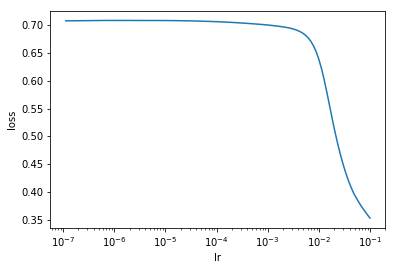

In [31]:
plt.ylabel("loss")
plt.xlabel("lr")
plt.xscale("log")
plt.plot(lr_find_lr, lr_find_loss)
plt.show()

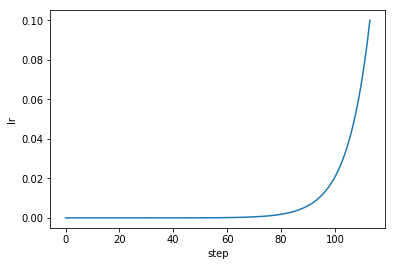

In [29]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

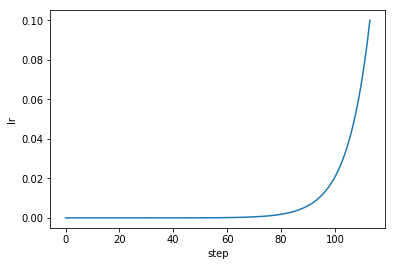

In [30]:
plt.ylabel("lr")
plt.xlabel("step")
plt.plot(range(len(lr_find_lr)), lr_find_lr)
plt.show()

In [0]:
lr_max = 5*10e-1

In [0]:
def cyclical_lr(stepsize, min_lr=5, max_lr=5e-1):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [0]:
def test(model, device, valid_loader):
    model.eval()
    test_losses = []
    correct = 0
    valid_preds = np.zeros((len(x_val), num_classes))
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = torch.sigmoid(output)
            
            test_losses.append(test_loss.item())
            #pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(valid_loader)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        np.mean(test_losses), correct, len(valid_loader),
        100. * correct / len(valid_loader)))
    
    return np.mean(test_losses), correct / len(valid_loader)

In [0]:
epochs = 47

In [0]:
# Parameters

factor = 6
end_lr = lr_max
iter=0
total_logs = []



# Do 3 sequential runs
for run in tqdm_notebook(range(3)):
    
    # Instantiate the model  
    model = Classifier(num_classes=num_classes).to(device)
    
    # Define the loss function
    criterion = nn.BCEWithLogitsLoss()
    
    # Define the optimizer
    optimizer = Adam(params=model.parameters(), lr=1., amsgrad=False)
    #optimizer = torch.optim.SGD(model.parameters(), lr=1.)
    step_size = 4*len(train_loader)
    clr = cyclical_lr(step_size, min_lr=end_lr/factor, max_lr=end_lr)
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])
    
    logs = []

    #Train the model
    iter = 0
    for epoch in range(epochs):

        losses = []
        accuracies = []

        for i, (images, labels) in enumerate(train_loader):

            # Send data to GPU
            images, labels = images.to(device), labels.to(device)

            # Clear the gradients
            optimizer.zero_grad()

            # Forward propagation 
            outputs = model(images)   
            
            # Calculating loss with softmax to obtain cross entropy loss
            loss = criterion(outputs, labels)

            # Backward propation
            loss.backward()
            
            # Clip the gradients norm to avoid them becoming too large
            clip_grad_norm_(model.parameters(), 5)
            
            # Update the LR
            scheduler.step()
            
            losses.append(loss.item())
            lr_sched_test = scheduler.get_lr()

            # Updating gradients
            optimizer.step()

            iter += 1
            
            # Total number of labels
            total = labels.size(0)

            # Obtaining predictions from max value
            #_, predicted = torch.max(outputs.data, 1)
            predicted = outputs

            # Calculate the number of correct answers
            correct = (predicted == labels).sum().item()
    
            accuracies.append(correct/total)

        print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

        valid_loss, valid_acc = test(model, device, valid_loader)
          
        logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
        })
            
        
    with open(os.path.join(path,"flowers_{}_{}.pickle".format('sgd_clr',datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
        pickle.dump(logs,file)

-- Epoch 0, average training loss: 6.4706, average training accuracy: 0.000000

Test set: Average loss: 5.0441, Accuracy: 110686/8 (1383575%)

-- Epoch 1, average training loss: 6576.5323, average training accuracy: 0.000000

Test set: Average loss: 117719.9795, Accuracy: 129332/8 (1616650%)

-- Epoch 2, average training loss: 435008.0624, average training accuracy: 0.000000

Test set: Average loss: 187.5238, Accuracy: 134578/8 (1682225%)

-- Epoch 3, average training loss: 28279.0291, average training accuracy: 0.000000

Test set: Average loss: 737803.1250, Accuracy: 61292/8 (766150%)

-- Epoch 4, average training loss: 91582.2886, average training accuracy: 0.000000

Test set: Average loss: 7896.6518, Accuracy: 66510/8 (831375%)

-- Epoch 5, average training loss: 2376.5635, average training accuracy: 0.000000

Test set: Average loss: 479.3957, Accuracy: 136346/8 (1704325%)

-- Epoch 6, average training loss: 597.5234, average training accuracy: 0.000000

Test set: Average loss: 193.

In [24]:
for key in ["rmsprop","adagrad","adamax","adam","adadelta"]:
      
    print("testing optimizer {}".format(key))

    total_logs = []
    
    # Do 3 runs each    
    for run in tqdm_notebook(range(3)):
        
        print("doing run {} of 3".format(run))
        
        # Instantiate the model
        model = Classifier(num_classes=num_classes).cuda()
        
        # Define the loss function
        #criterion = nn.CrossEntropyLoss()
        criterion = nn.BCEWithLogitsLoss().cuda()
    
        # Define the optimizer
        if key == "adam":
            optimizer = torch.optim.Adam(model.parameters())
        elif key == "adamax":
            optimizer = torch.optim.Adamax(model.parameters())
        elif key == "adagrad":
            optimizer = torch.optim.Adagrad(model.parameters())
        elif key == "adadelta":
            optimizer = torch.optim.Adadelta(model.parameters())
        elif key == "rmsprop":
            optimizer = torch.optim.RMSprop(model.parameters())
            
        
        
        logs = []

        #Train the model
        iter = 0
        for epoch in range(epochs):

            losses = []
            accuracies = []

            for i, (images, labels) in enumerate(train_loader):

                # Send the data to the GPU
                images, labels = images.to(device), labels.to(device)

                # Clear the gradients
                optimizer.zero_grad()

                # Forward propagation 
                outputs = model(images)      

                # Calculating loss with softmax to obtain cross entropy loss
                loss = criterion(outputs, labels)

                # Backward propation
                loss.backward()
                losses.append(loss.item())

                # Updating gradients
                optimizer.step()

                iter += 1

                # Total number of labels
                total = labels.size(0)

                # Obtaining predictions from max value
                #_, predicted = torch.max(outputs.data, 1)
                
                predicted = outputs
                # Calculate the number of correct answers
                correct = (predicted == labels).sum().item()
    
                accuracies.append(correct/total)

            print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

            valid_loss, valid_acc = test(model, device, valid_loader)
            
            logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
            })
            
        
        with open(os.path.join(path,"flowers_{}_{}.pickle".format(key,datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
            pickle.dump(logs,file)

testing optimizer rmsprop


doing run 0 of 3
-- Epoch 0, average training loss: 0.1027, average training accuracy: 0.000000

Test set: Average loss: 0.0748, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0846, average training accuracy: 0.000000

Test set: Average loss: 0.0751, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0727, average training accuracy: 0.000000

Test set: Average loss: 0.0763, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.1004, average training accuracy: 0.000000

Test set: Average loss: 0.0756, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.2001, average training accuracy: 0.000000

Test set: Average loss: 0.0786, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0725, average training accuracy: 0.000000

Test set: Average loss: 0.0752, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.1049, average training accuracy: 0.000000

Test set: Average loss: 0.0784, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.3386, average training accuracy: 0.000000

Test set: Average loss: 0.1302, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.2892, average training accuracy: 0.000000

Test set: Average loss: 0.0711, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0722, average training accuracy: 0.000000

Test set: Average loss: 0.0710, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.3439, average training accuracy: 0.000000

Test set: Average loss: 0.1332, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 1.8977, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0723, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.3307, average training accuracy: 0.000000

Test set: Average loss: 0.1266, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.5969, average training accuracy: 0.000000

Test set: Average loss: 0.4144, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1003, average training accuracy: 0.000000

Test set: Average loss: 0.0713, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0722, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.6026, average training accuracy: 0.000000

Test set: Average loss: 0.4341, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1007, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0720, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.6070, average training accuracy: 0.000000

Test set: Average loss: 0.4320, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.6353, average training accuracy: 0.000000

Test set: Average loss: 0.5090, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1001, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0721, average training accuracy: 0.000000

Test set: Average loss: 0.0711, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.6333, average training accuracy: 0.000000

Test set: Average loss: 0.4802, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0860, average training accuracy: 0.000000

Test set: Average loss: 0.0716, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0721, average training accuracy: 0.000000

Test set: Average loss: 0.0713, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.6390, average training accuracy: 0.000000

Test set: Average loss: 0.5243, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.6051, average training accuracy: 0.000000

Test set: Average loss: 0.3935, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1147, average training accuracy: 0.000000

Test set: Average loss: 0.0721, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0726, average training accuracy: 0.000000

Test set: Average loss: 0.0720, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.5983, average training accuracy: 0.000000

Test set: Average loss: 0.4207, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0970, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0723, average training accuracy: 0.000000

Test set: Average loss: 0.0718, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.5997, average training accuracy: 0.000000

Test set: Average loss: 0.3825, Accuracy: 0/8 (0%)

-- Epoch 1, average train

In [0]:
def train_model(x_train, y_train, train_transforms):
    num_epochs = 118
    batch_size = 128
    test_batch_size = 256
    lr = 1e-3
    eta_min = 1e-5
    t_max = 5
    
    num_classes = y_train.shape[1]

    x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)
    
    train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
    valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

    model = Classifier(num_classes=num_classes).cuda()
    criterion = nn.BCEWithLogitsLoss().cuda()
    optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
    scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)

    best_epoch = -1
    best_lwlrap = 0.
    mb = master_bar(range(num_epochs))

    for epoch in mb:
        start_time = time.time()
        model.train()
        avg_loss = 0.

        for x_batch, y_batch in train_loader:
            preds = model(x_batch.cuda())
            loss = criterion(preds, y_batch.cuda())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss.item() / len(train_loader)

        model.eval()
        valid_preds = np.zeros((len(x_val), num_classes))
        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            preds = model(x_batch.cuda()).detach()
            loss = criterion(preds, y_batch.cuda())

            preds = torch.sigmoid(preds)
            valid_preds[i * test_batch_size: (i+1) * test_batch_size] = preds.cpu().numpy()

            avg_val_loss += loss.item() / len(valid_loader)
            
        score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
        lwlrap = (score * weight).sum()
        
        scheduler.step()

        if (epoch + 1) % 1 == 0:
            elapsed = time.time() - start_time
            mb.write(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  val_lwlrap: {lwlrap:.6f}  time: {elapsed:.0f}s')
    
        if lwlrap > best_lwlrap:
            best_epoch = epoch + 1
            best_lwlrap = lwlrap
            torch.save(model.state_dict(), 'weight_best.pt')
            
    return {
        'best_epoch': best_epoch,
        'best_lwlrap': best_lwlrap,
    }

In [0]:
result = train_model(x_train, y_train, transforms_dict['train'])

In [0]:
result

## Different approachs

In [0]:
#data augmentation to be applied

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

desired_size=448

ratio = float(desired_size)/max(old_size)

new_size = (448, 448)

im = old_im.resize(new_size, Image.ANTIALIAS)

new_im = Image.new("RGB", (desired_size, desired_size))

new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
new_im.show()

In [0]:
#Augmentation:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomRotation(10),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

### Data augmentation

***Increase model accuracy***

In [0]:
#https://becominghuman.ai/data-augmentation-using-fastai-aefa88ca03f1
#1st augmentation:
transforms_basic    = [RandomRotate(10), RandomLighting(0.05, 0.05)] 
transforms_side_on  = transforms_basic + [RandomFlip()] 
transforms_top_down = transforms_basic + [RandomDihedral()]

In [0]:
class FATTrainDataset(Dataset):
    def __init__(self, mels, labels, transforms):
        super().__init__()
        self.mels = mels
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        # crop 1sec
        image = Image.fromarray(self.mels[idx], mode='RGB')        
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)
        
        label = self.labels[idx]
        label = torch.from_numpy(label).float()
        
        return image, label

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

In [0]:
train_transforms = transforms_dict['train']

batch_size = 128

test_batch_size = 256

In [0]:
num_classes = y_train.shape[1]

x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

In [0]:
len(train_dataset), len(valid_dataset)

In [0]:
train_dataset[0]

In [0]:
train_dataset.mels[0]

In [0]:
train_dataset.mels[2].shape

In [0]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset.mels[2])

In [0]:
train_dataset.labels[2]

In [0]:
mb_example = next(iter(train_loader))

In [0]:
mb_example[0].size(), mb_example[1].size()

In [0]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy())

In [0]:
len(x_train)

In [0]:
image = Image.fromarray(x_train[0], mode='RGB')        
plt.imshow(image)

In [0]:
x_train[0].shape

In [0]:
old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

In [0]:
old_size

In [0]:
old_im = Image.fromarray(x_train[0], mode='RGB') 
desired_size = max(old_im.size)

In [0]:
new_size = (desired_size, desired_size)
new_size

In [0]:
#data augmentation to be applied

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

desired_size=448

ratio = float(desired_size)/max(old_size)

new_size = (448, 448)

im = old_im.resize(new_size, Image.ANTIALIAS)

new_im = Image.new("RGB", (desired_size, desired_size))

new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))
new_im.show()

In [0]:
plt.imshow(new_im)

In [0]:
np.array(new_im).shape

In [0]:
image = Image.fromarray(x_train[0], mode='RGB')     
time_dim, base_dim = image.size
crop = random.randint(0, time_dim - base_dim)
image = image.crop([crop, 0, crop + base_dim, base_dim])
plt.imshow(image)

In [0]:
np.array(image).shape

In [0]:
import Image

old_im = Image.fromarray(x_train[0], mode='RGB')        
old_size = old_im.size

new_size = (800, 800)
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])/2,
                      (new_size[1]-old_size[1])/2))

new_im.show()
# new_im.save('someimage.jpg'

In [0]:
image = Image.fromarray(self.mels[idx], mode='RGB')        
time_dim, base_dim = image.size
crop = random.randint(0, time_dim - base_dim)
image = image.crop([crop, 0, crop + base_dim, base_dim])
image = self.transforms(image).div_(255)

In [0]:
class FATTestDataset(Dataset):
    def __init__(self, fnames, mels, transforms, tta=5):
        super().__init__()
        self.fnames = fnames
        self.mels = mels
        self.transforms = transforms
        self.tta = tta
        
    def __len__(self):
        return len(self.fnames) * self.tta
    
    def __getitem__(self, idx):
        new_idx = idx % len(self.fnames)
        
        image = Image.fromarray(self.mels[new_idx], mode='RGB')
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        fname = self.fnames[new_idx]
        
        return image, fname

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ]),
}

***Changes: lr finder***

In [0]:
model = model_ft
criterion = nn.BCEWithLogitsLoss().cuda()
optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)


In [0]:
#pretrained models:
!pip install pretrainedmodels

In [0]:
import pretrainedmodels
print(pretrainedmodels.model_names)

In [0]:
# to load a pretrained models
model_name = 'resnet50' # could be fbresnet152 or inceptionresnetv2
model_ft = pretrainedmodels.__dict__[model_name](num_classes=1000)
#model.eval()

In [0]:
model_ft

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features
model_ft.last_linear = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features

model_ft.last_linear = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=num_ftrs, out_features=1024, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=80, bias=True)
)

In [0]:
model_ft = model_ft.to(device)

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet50()
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)
"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model_ft.classifier

In [0]:
# as defined in the link:
#https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
import torch.nn as nn
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(511, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(127, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [0]:
Classifier(num_classes=num_classes)

In [0]:
def train_model(x_train, y_train, train_transforms):
    num_epochs = 118
    batch_size = 128
    test_batch_size = 256
    lr = 1e-3
    eta_min = 1e-5
    t_max = 5
    
    num_classes = y_train.shape[1]

    x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)
    
    train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
    valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

    #model = Classifier(num_classes=num_classes).cuda()
    model = model_ft
    criterion = nn.BCEWithLogitsLoss().cuda()
    optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
    scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)

    best_epoch = -1
    best_lwlrap = 0.
    mb = master_bar(range(num_epochs))

    for epoch in mb:
        start_time = time.time()
        model.train()
        avg_loss = 0.

        for x_batch, y_batch in train_loader:
            preds = model(x_batch.cuda())
            loss = criterion(preds, y_batch.cuda())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss.item() / len(train_loader)

        model.eval()
        valid_preds = np.zeros((len(x_val), num_classes))
        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            preds = model(x_batch.cuda()).detach()
            loss = criterion(preds, y_batch.cuda())

            preds = torch.sigmoid(preds)
            valid_preds[i * test_batch_size: (i+1) * test_batch_size] = preds.cpu().numpy()

            avg_val_loss += loss.item() / len(valid_loader)
            
        score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
        lwlrap = (score * weight).sum()
        
        scheduler.step()

        if (epoch + 1) % 1 == 0:
            elapsed = time.time() - start_time
            mb.write(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  val_lwlrap: {lwlrap:.6f}  time: {elapsed:.0f}s')
    
        if lwlrap > best_lwlrap:
            best_epoch = epoch + 1
            best_lwlrap = lwlrap
            torch.save(model.state_dict(), 'weight_best.pt')
            
    return {
        'best_epoch': best_epoch,
        'best_lwlrap': best_lwlrap,
    }

In [0]:
result = train_model(x_train, y_train, transforms_dict['train'])

In [0]:
result

In [0]:
def predict_model(test_fnames, x_test, test_transforms, num_classes, *, tta=5):
    batch_size = 256

    test_dataset = FATTestDataset(test_fnames, x_test, test_transforms, tta=tta)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = model_ft
    model.load_state_dict(torch.load('weight_best.pt'))
    model.cuda()
    model.eval()

    all_outputs, all_fnames = [], []

    pb = progress_bar(test_loader)
    for images, fnames in pb:
        preds = torch.sigmoid(model(images.cuda()).detach())
        all_outputs.append(preds.cpu().numpy())
        all_fnames.extend(fnames)

    test_preds = pd.DataFrame(data=np.concatenate(all_outputs),
                              index=all_fnames,
                              columns=map(str, range(num_classes)))
    test_preds = test_preds.groupby(level=0).mean()

    return test_preds

In [0]:
test_preds = predict_model(test_df['fname'], x_test, transforms_dict['test'], num_classes, tta=35)

In [0]:
test_df[labels] = test_preds.values
test_df.to_csv('submission.csv', index=False)
test_df.head()

### ***Study of cnn architecture:***
layers which works

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet152()

In [0]:
model_ft

In [0]:
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).to(device)
ans = model_ft(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

In [0]:


"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model = model_ft
criterion = nn.BCEWithLogitsLoss().cuda()
optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)


In [0]:
#pretrained models:
!pip install pretrainedmodels

In [0]:
import pretrainedmodels
print(pretrainedmodels.model_names)

In [0]:
# to load a pretrained models
model_name = 'se_resnet50' # could be fbresnet152 or inceptionresnetv2
model_ft = pretrainedmodels.__dict__[model_name](num_classes=1000)
#model.eval()

In [0]:
model_ft

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features
model_ft.last_linear = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_ftrs = model_ft.last_linear.in_features

model_ft.last_linear = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features=num_ftrs, out_features=1024, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(in_features=1024, out_features=512, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=512, out_features=80, bias=True)
)

In [0]:
model_ft = model_ft.to(device)

In [0]:
import torchvision.models as models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_ft = models.resnet50()
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 80)

model_ft = model_ft.to(device)
"""
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
"""

In [0]:
model_ft.classifier

In [0]:
# as defined in the link:
#https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
import torch.nn as nn
# Add on classifier
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(511, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(127, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [0]:
Classifier(num_classes=num_classes)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
model=Classifier(num_classes=num_classes)
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).type(dtype)
ans = model(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

In [0]:
len(train_dataset), len(valid_dataset)

In [0]:
train_dataset[0]

In [0]:
train_dataset.mels[0]

In [0]:
train_dataset.mels[2].shape

In [0]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset.mels[2])

In [0]:
train_dataset.labels[2]

In [0]:
mb_example = next(iter(train_loader))

In [0]:
mb_example[0].size(), mb_example[1].size()

In [0]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy())

In [0]:
for i, (images, labels) in enumerate(train_loader):
  print(labels)

In [0]:
dtype = torch.FloatTensor # the CPU datatype
## Now we're going to feed a random batch into the model you defined and make sure the output is the right size
x = torch.randn(64, 3, 128, 128).to(device)
ans = model_ft(x)        # Feed it through the model! 

# Check to make sure what comes out of your model
# is the right dimensionality... this should be True
# if you've done everything correctly
np.array_equal(np.array(ans.size()), np.array([64, 80]))

### lr_finder()

In [0]:
path = 'sample_data/'

epochs = 3

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import clip_grad_norm_, clip_grad_value_
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

from tqdm import tqdm_notebook
from shutil import copyfile
import os
import math
import pickle
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

import PIL
from PIL import Image
from collections import Counter

In [0]:
def test(model, device, valid_loader):
    model.eval()
    test_losses = []
    correct = 0
    valid_preds = np.zeros((len(x_val), num_classes))
    with torch.no_grad():
        for data, target in valid_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = criterion(output, target)
            pred = torch.sigmoid(output)
            
            test_losses.append(test_loss.item())
            #pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(valid_loader)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        np.mean(test_losses), correct, len(valid_loader),
        100. * correct / len(valid_loader)))
    
    return np.mean(test_losses), correct / len(valid_loader)

In [0]:
for key in ["rmsprop","adagrad","adamax","adam","adadelta"]:
      
    print("testing optimizer {}".format(key))

    total_logs = []
    
    # Do 3 runs each    
    for run in tqdm_notebook(range(3)):
        
        print("doing run {} of 3".format(run))
        
        # Instantiate the model
        model = Classifier(num_classes=num_classes).cuda()
        
        # Define the loss function
        #criterion = nn.CrossEntropyLoss()
        criterion = nn.BCEWithLogitsLoss().cuda()
    
        # Define the optimizer
        if key == "adam":
            optimizer = torch.optim.Adam(model.parameters())
        elif key == "adamax":
            optimizer = torch.optim.Adamax(model.parameters())
        elif key == "adagrad":
            optimizer = torch.optim.Adagrad(model.parameters())
        elif key == "adadelta":
            optimizer = torch.optim.Adadelta(model.parameters())
        elif key == "rmsprop":
            optimizer = torch.optim.RMSprop(model.parameters())
            
        
        
        logs = []

        #Train the model
        iter = 0
        for epoch in range(epochs):

            losses = []
            accuracies = []

            for i, (images, labels) in enumerate(train_loader):

                # Send the data to the GPU
                images, labels = images.to(device), labels.to(device)

                # Clear the gradients
                optimizer.zero_grad()

                # Forward propagation 
                outputs = model(images)      

                # Calculating loss with softmax to obtain cross entropy loss
                loss = criterion(outputs, labels)

                # Backward propation
                loss.backward()
                losses.append(loss.item())

                # Updating gradients
                optimizer.step()

                iter += 1

                # Total number of labels
                total = labels.size(0)

                # Obtaining predictions from max value
                #_, predicted = torch.max(outputs.data, 1)
                
                predicted = outputs
                # Calculate the number of correct answers
                correct = (predicted == labels).sum().item()
    
                accuracies.append(correct/total)

            print("-- Epoch {}, average training loss: {:.4f}, average training accuracy: {:2f}".format(epoch, np.mean(losses), np.mean(accuracies)))

            valid_loss, valid_acc = test(model, device, valid_loader)
            
            logs.append({
                'acc':np.mean(accuracies),
                "loss":np.mean(losses),
                "val_acc":valid_acc,
                "val_loss":valid_loss
            })
            
        
        with open(os.path.join(path,"flowers_{}_{}.pickle".format(key,datetime.now().strftime('%Y%m%d%H%M%S') )),'wb') as file:
            pickle.dump(logs,file)

testing optimizer rmsprop


doing run 0 of 3
-- Epoch 0, average training loss: 0.1027, average training accuracy: 0.000000

Test set: Average loss: 0.0748, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0846, average training accuracy: 0.000000

Test set: Average loss: 0.0751, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0727, average training accuracy: 0.000000

Test set: Average loss: 0.0763, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.1004, average training accuracy: 0.000000

Test set: Average loss: 0.0756, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.2001, average training accuracy: 0.000000

Test set: Average loss: 0.0786, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0725, average training accuracy: 0.000000

Test set: Average loss: 0.0752, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.1049, average training accuracy: 0.000000

Test set: Average loss: 0.0784, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.3386, average training accuracy: 0.000000

Test set: Average loss: 0.1302, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.2892, average training accuracy: 0.000000

Test set: Average loss: 0.0711, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0722, average training accuracy: 0.000000

Test set: Average loss: 0.0710, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.3439, average training accuracy: 0.000000

Test set: Average loss: 0.1332, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 1.8977, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0723, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.3307, average training accuracy: 0.000000

Test set: Average loss: 0.1266, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.5969, average training accuracy: 0.000000

Test set: Average loss: 0.4144, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1003, average training accuracy: 0.000000

Test set: Average loss: 0.0713, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0722, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.6026, average training accuracy: 0.000000

Test set: Average loss: 0.4341, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1007, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0720, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.6070, average training accuracy: 0.000000

Test set: Average loss: 0.4320, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.6353, average training accuracy: 0.000000

Test set: Average loss: 0.5090, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1001, average training accuracy: 0.000000

Test set: Average loss: 0.0712, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0721, average training accuracy: 0.000000

Test set: Average loss: 0.0711, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.6333, average training accuracy: 0.000000

Test set: Average loss: 0.4802, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0860, average training accuracy: 0.000000

Test set: Average loss: 0.0716, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0721, average training accuracy: 0.000000

Test set: Average loss: 0.0713, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.6390, average training accuracy: 0.000000

Test set: Average loss: 0.5243, Accuracy: 0/8 (0%)

-- Epoch 1, average train

doing run 0 of 3
-- Epoch 0, average training loss: 0.6051, average training accuracy: 0.000000

Test set: Average loss: 0.3935, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.1147, average training accuracy: 0.000000

Test set: Average loss: 0.0721, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0726, average training accuracy: 0.000000

Test set: Average loss: 0.0720, Accuracy: 0/8 (0%)

doing run 1 of 3
-- Epoch 0, average training loss: 0.5983, average training accuracy: 0.000000

Test set: Average loss: 0.4207, Accuracy: 0/8 (0%)

-- Epoch 1, average training loss: 0.0970, average training accuracy: 0.000000

Test set: Average loss: 0.0715, Accuracy: 0/8 (0%)

-- Epoch 2, average training loss: 0.0723, average training accuracy: 0.000000

Test set: Average loss: 0.0718, Accuracy: 0/8 (0%)

doing run 2 of 3
-- Epoch 0, average training loss: 0.5997, average training accuracy: 0.000000

Test set: Average loss: 0.3825, Accuracy: 0/8 (0%)

-- Epoch 1, average train